In [1]:
import numpy as np
import imp
import methods
import besttest
import matplotlib.pyplot as plt

In [69]:
imp.reload(besttest)
N = 1250
M = 500
n=200
spikes = np.array([45])
spikes = np.append(spikes, 5.0*np.ones(shape=249))
#U, S, V = besttest.spikedWishart(N, M, spikes)
n = 500
ss = np.zeros(shape=(n, M))
vv = np.zeros(n)
for i in range(n):
    U, S, V = besttest.spikedWishart(N, M, spikes)
    ss[i, :] = S
    vv[i] = V[0, 0]


In [70]:
np.std(ss[:, 0])

1.8155825462399866

In [71]:
np.mean(ss[:, 0])

46.321235733468924

In [72]:
imp.reload(methods)
fit = methods.fitter(N=N, M=M)
fit.square_root_est(ss[40, :].flatten(), 50, 3, 1)

37.34736156664113 40.4321815120709
Outlier:  1
Sample eigenvalue:  47.88933120452275
Estimated population eigenvalue: 46.56564204075342
Sample eigenvalue standard deviation:  1.8598223968772216
Overlap: 0.9694347803620501
Relative overlap std:  0.0008920884930381207


In [68]:
fit.r

2.6695273641597765

In [62]:
np.power(1+np.sqrt(M/N), 2.0)

2.6649110640673523

In [46]:

dif = S[0] - S[1:]
m = np.mean(-1.0/dif)
m = (M-1)*m/M
print(m)
mtil = (M/N)* m + ((M/N)-1) / S[0]
print('other geuss:', -1 / mtil)

-0.022281006230400423
other geuss: 45.42662758362174


In [48]:
imp.reload(besttest)
gam = M/N
#print(besttest.mz(S[0], gam))
print(-1 / besttest.mtilz(S[0], gam))
print(np.sqrt(2.0 / (N*besttest.mptilz(S[0], gam))))

45.38860665190228
1.8153599700867662


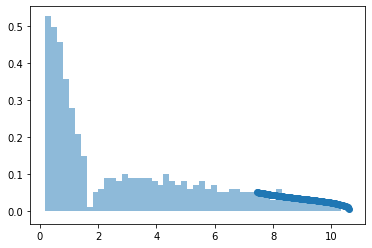

In [74]:
p = fit.density
l, r = fit.l, fit.r
x = np.arange(0,100) *(r-l)/100+l
plt.scatter(x, 50*p(x)/M)
plt.hist(S.flatten()[3:], bins=50, alpha=0.5, density = True)
plt.show()

In [25]:
fit.l

1.0365277023337498

In [26]:
fit.r

1.638146408356735

In [22]:
fit.rh

5.872675407429734

In [49]:
np.sqrt(2*45*45*(44*44-0.4)/(44*44*1250))

1.7998140399809077

In [50]:
1 / np.sqrt(500)

0.044721359549995794

In [128]:
imp.reload(methods)

<module 'methods' from '/Users/benlandon/Documents/new_career/git_repo/spiked_models/methods.py'>

In [88]:
S = ss[23, :]
S.shape

(500,)

In [129]:
spec = methods.spectrum(S, N, M, nout=1)

In [130]:
spec.fit(30,50,3)

In [131]:
spec.calc_outlier_quants()

1.4197031707348244e-06


In [132]:
spec.report()

Sample eigenvalue:  46.86612651909848
Estimated population eigenvalue:  45.56485207167417
Estimated sample eigenvalue std:,  1.8198256728594466
Estimated overlap: 0.9692829357033365
Normalized overlap std: 0.0009118894744910851
overlap std: 0.0008838789068716917


In [106]:
spec.appr_esd.calc_m(S[0], 3)

1.6837106174529739e-06

In [107]:
(m, mp, mppp) = (spec.appr_esd.calc_m(S[0], 0), spec.appr_esd.calc_m(S[0], 1), spec.appr_esd.calc_m(S[0], 3))

In [111]:
s = S[0]
data = (s, m, mp, mppp)

In [118]:
methods.calc_outlier_quantities(N, M, data)

-7.273467677244498e-08


/Users/benlandon/Documents/new_career/git_repo/spiked_models/methods.py:209: RuntimeWarning: invalid value encountered in sqrt
  else:


(45.56485207167417, 1.8198256728594466, 0.9692829357033365, nan)

In [113]:
gam = M / N

In [117]:
imp.reload(methods)
mppptil = gam*mppp+6*(1-gam) / np.power(s, 4.0)

In [115]:
mppptil

1.4197031707348244e-06

In [116]:
np.sqrt(mppptil / (3*N))

1.945732541219253e-05

In [133]:
p = spec.edge_density.p
l, r = spec.edge_density.l, spec.edge_density.r

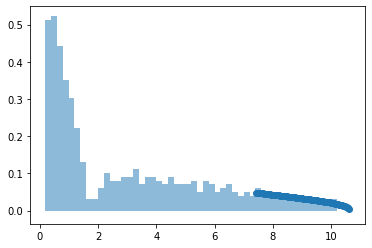

In [134]:
x = np.arange(0,100) *(r-l)/100+l
plt.scatter(x, 50*p(x)/M)
plt.hist(S.flatten()[3:], bins=50, alpha=0.5, density = True)
plt.show()

In [135]:
print(r)

10.65827674831295


In [136]:
S[1]

10.570817396308351

In [137]:
S[2]

10.300350025931792

In [138]:
S[3]

10.208439974914551